### 1. Understand the Problem

Given certain features of the iris plant, can we predict which speices of iris it is?

From the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris) we have the following information regarding this data set:

* 150 instances or data points
* 4 attributes per each instance
* Label is the class of iris - 3 possible outcomes (Setosa, Versicolor, Virginica)
* Data contains no missing values

This is a **supervised classification** problem.


### 2. Data Collection & Cleaning

There are several different ways to load this data into Python (download the csv, load from the UCI repo directly, or load from sklearn.datasets).   I will show you how to load it from the UCI repository directly.

#### Load Data

In [1]:
import pandas as pd

#Column names given from the UCI description page
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
#Load the data
iris_full = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=col_names)

Verify that everything loaded properly by checking for 150 instances, 4 attributes & 1 label column.

In [2]:
iris_full.shape

(150, 5)

In [3]:
iris_full.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Clean Data

This data set requires no cleaning to be done, which is why this is a nice data set for your first machine learning problem.  All the feature columns are numerical and there are no missing values to fill in.  Let's verify this is the case.

In [4]:
#Are all columns numerical?
iris_full.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [5]:
#Any missing values?
iris_full.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [6]:
#Info function to look at data
iris_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### 3. Explore & Understand the Data

Exploratory data analysis is a crucial step that is easy to overlook.  Visualizing the data first, not only will give us a feel for what is going on but can allow us to more easily interpret and draw conclusions from the data.  First I will do some quantitative exploration, then I will make some visualizations.

#### Quantitative Exploration

In [7]:
iris_full.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#look at distribution of labels
iris_full['class'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: class, dtype: float64

#### Visual Exploration

Look for how the variables are distributed, for patterns, or correlations between features and our label.

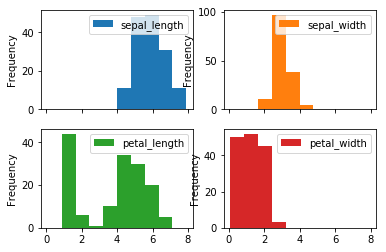

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#Plot histogram
iris_full.plot(kind='hist', layout=(2, 2), subplots=True);

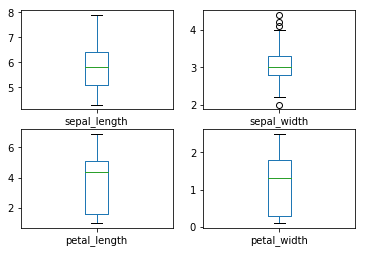

In [10]:
#Plot box plot
iris_full.plot(kind='box', layout=(2,2), subplots=True);

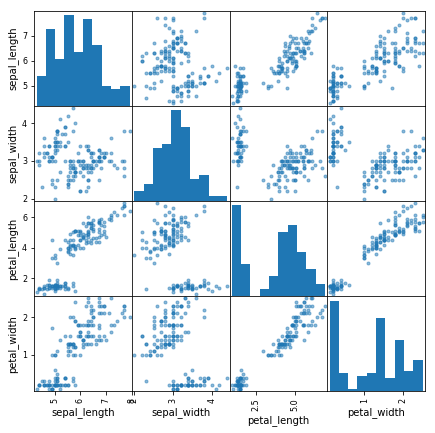

In [11]:
#Scatter Matrix
from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris_full, figsize=(7,7));

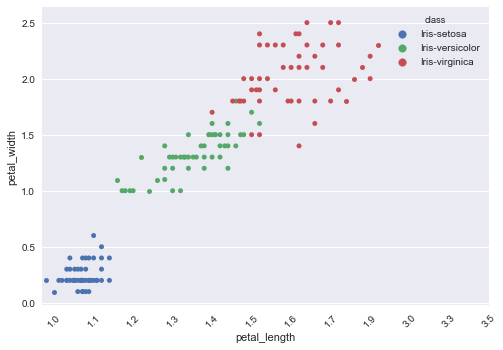

In [12]:
#Swarm Plot
import seaborn as sns

#Plot Petal length vs Petal Width
sns.swarmplot(x='petal_length', y='petal_width', hue='class', data=iris_full);
plt.xticks(range(1,60, 5), rotation=45);

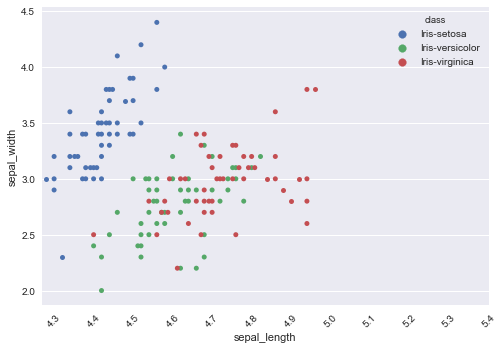

In [13]:
#Plot Sepal Length vs Spela Width
sns.swarmplot(x='sepal_length', y='sepal_width', hue='class', data=iris_full);
plt.xticks(range(1,60, 5), rotation=45);

After this EDA we have a rough idea of the distribution of the data.  We also can see from these last two swarm plots that there is a clear relationship between our feature variables and the class of Iris.  Petal width and petal length seem to strongly predict the Iris class.

### 4. Prepare data for Machine Learning Algorithms

#### Feature engineering

For this problem, there are no features I want to engineer at this time.  The beauty of the Iris data set is that it is small, simple, and relatively straight forward.  This allows an end-to-end machine learning problem to be illustrated with minimal complication.  So for this problem, no new features will be added to our data.

#### Split into Train & Test Set

We will however, split the data into a training and a testing set.  This enhances model integrity because we can reasonably assume that our model will generalize to unseen data if we only train it on a portion of the data we do have (train set) and it tests well on some data we withheld (test set) that the model has not yet seen.

After this train and test split, we will train and tune models using cross-validation before making a final evaluation of the model on the test set.

In [14]:
from sklearn import model_selection

#Get values from DataFrame - Sklearn wants numpy arrays
X = iris_full.values[ :, 0:4] #Select only feature columns
y = iris_full.values[ :, 4] #Select only class label

#Split into train (70%) and test (30%)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

### 5. Modeling

At this point, with our data pre-processed and ready we can begin to build some models using various machine learning algorithms.  We will only use the training set to build and tune our model.  Using a process called cross-validation we can try to protect against overfitting our training data.

#### K-Nearest Neighbors

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#Initialize Model
knn_model = KNeighborsClassifier()
#Train & Test Model using Cross-Validation
cv_results = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='accuracy')
#Output CV Results
print cv_results.mean()

0.933686868687


#### Support Vector Classifier

In [26]:
from sklearn.svm import SVC

#Initialize Model
svm_model = SVC()
#Train & Test Model using Cross-Validation
cv_results = cross_val_score(svm_model, X_train, y_train, cv=10, scoring='accuracy')
#Output CV Results
print cv_results.mean()

0.962222222222


#### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

#Initialize Model
rf = RandomForestClassifier()
#Train & Test Model using Cross-Validation
cv_results = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
#Output CV Results
print cv_results.mean()

0.952777777778


### 6. Evaluate & Tune Model

Our untuned Support Vector Classifier had the highest accuracy during the initial cross-validation, this does not necessarily mean it will be the best classifier for this problem but I will move forward using it for the final solution.

We can now work on tuning the hyper-parameters, those parameters which must be set before using the algorithm and are hence not learned from the data.  Here we will use GridSearchCV to find the optimal parameters for our model.

#### Optimizing with GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

#Parameter dictionary for gridsearch
params = {'C': [.001, .01, .1, 1, 10, 100, 1000],
          'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}
#Initialize Model
svm_model = SVC()
#Initialize GridSearch
grid_cv = GridSearchCV(svm_model, params, cv=10)
#Fit GridSearch
grid_cv.fit(X_train, y_train)
#Get Best Results
print "Best Score: {}, Best Parameters: {}".format(grid_cv.best_score_, grid_cv.best_params_)

Best Score: 0.971428571429, Best Parameters: {'kernel': 'linear', 'C': 1}


#### Verify on Test Set

In [30]:
from sklearn.metrics import accuracy_score

#Initialize Model
svm_model = SVC(kernel='linear', C=1)
#Fit Model
svm_model.fit(X_train, y_train)
#Make Predictions
predictions = svm_model.predict(X_test)
#Print score
print accuracy_score(y_test, predictions)

1.0


### 7. Present Results

After optimizing our Support Vector Classifier we had a classification accuracy of 97%.  On our test set with this optimally tuned model we scored 100%.  I attribute this perfect score to some luck in how our train and test set were split.  

However, given that our evaluation on the test set performed better than our cross-validation on the training data, we can reasonably assume that our classifier will be **accurate 97% or better** on unseen data.

#### Next Steps

Thank you for checking out this notebook.  You now have seen how to apply the machine learning process from start to finish.  At this point you could try training and/or tuning different models in step 6 to see if you can get a higher CV score.  Or you can try to recreate this process from start to finish using another beginner friendly data set.  Check out the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.html) for more data sets.